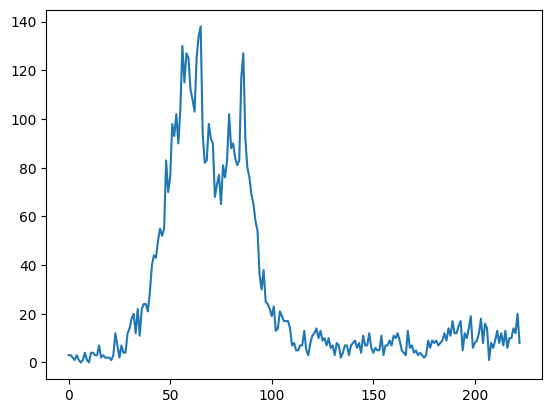

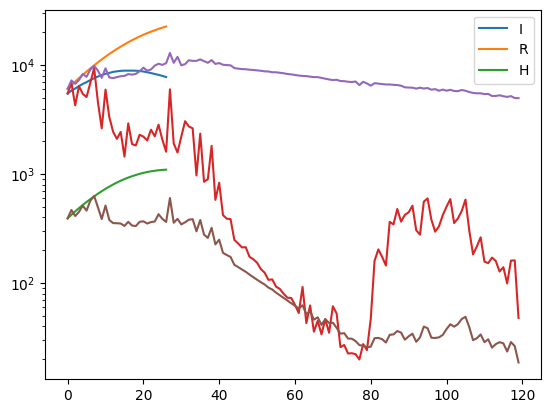

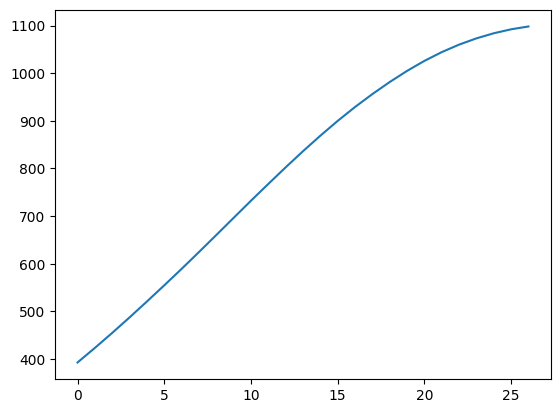

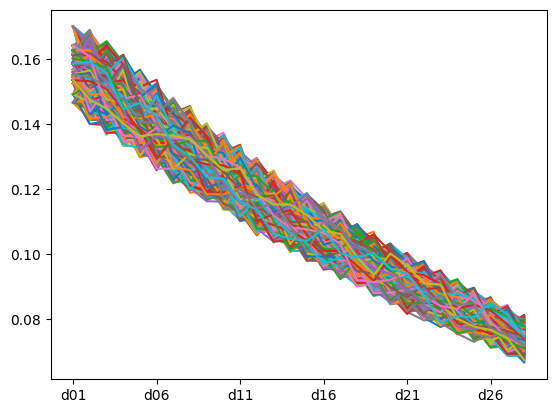

In [1]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import sys
import pandas as pd


predicted_beta = pd.read_csv('../datasets/out_logit-beta_trj_bootp.csv')
observations = pd.read_csv('../datasets/FLU_HOSPITALIZATIONS.csv').to_numpy()
observations = np.delete(observations,0,1)
estimated_state = pd.read_csv('../datasets/ESTIMATED_HOSP.csv').to_numpy()
estimated_state = np.delete(estimated_state,0,1)


plt.plot(observations)
plt.show()

def beta(t): 
    if(t < 27):
        return float(predicted_beta.iloc[500,t])
    else: 
        return float(predicted_beta.iloc[500,25])

y0 = np.concatenate((estimated_state[60],np.array([0])))

def RHS_H(state,t,param):
    #params has all the parameters – beta, gamma
    #state is a numpy array

        S,I,R,H,new_H = state #unpack the state variables
        N = S + I + R + H #compute the total population 

        new_H = (1/param['D'])*(param['gamma']) * I

        '''The state transitions of the ODE model is below'''
        dS = -param['beta'](int(t))*(S*I)/N + (1/param['L'])*R 
        dI = param['beta'](int(t))*S*I/N-(1/param['D'])*I
        dR = (1/param['hosp']) * H + ((1/param['D'])*(1-(param['gamma']))*I)-(1/param['L'])*R 
        dH = (1/param['D'])*(param['gamma']) * I - (1/param['hosp']) * H 

        return np.array([dS,dI,dR,dH,new_H])

t_span = np.linspace(0,27,27)

params={
"beta":beta,
"gamma":0.1,
"eta":0.1,
"std":10,
"R":1/10,
"hosp":15,
"L":90,
"D":10}

result_odeint = odeint(func=RHS_H,t = t_span,y0 = y0,args=(params,))

labels=['S','I','R','H','I->H']

plt.yscale('log')
for i in range(1,4): 
    plt.plot(result_odeint[:,i],label=labels[i])


plt.plot(estimated_state[60:,1:])
plt.legend()
plt.show()

plt.plot((result_odeint[:,3]))
plt.show()
for i in range(1000): 
    predicted_beta.iloc[i].plot()







